In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [59]:
med_df=pd.read_csv('insurance.csv')

In [61]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
med_df.shape

(1338, 7)

In [65]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
med_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [69]:
med_df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [71]:
med_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='charges', ylabel='Count'>

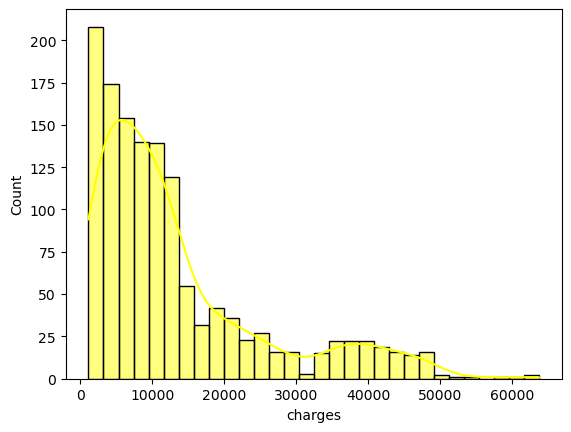

In [73]:
sns.histplot(med_df['charges'],kde=True,color='yellow')

<Axes: xlabel='age', ylabel='charges'>

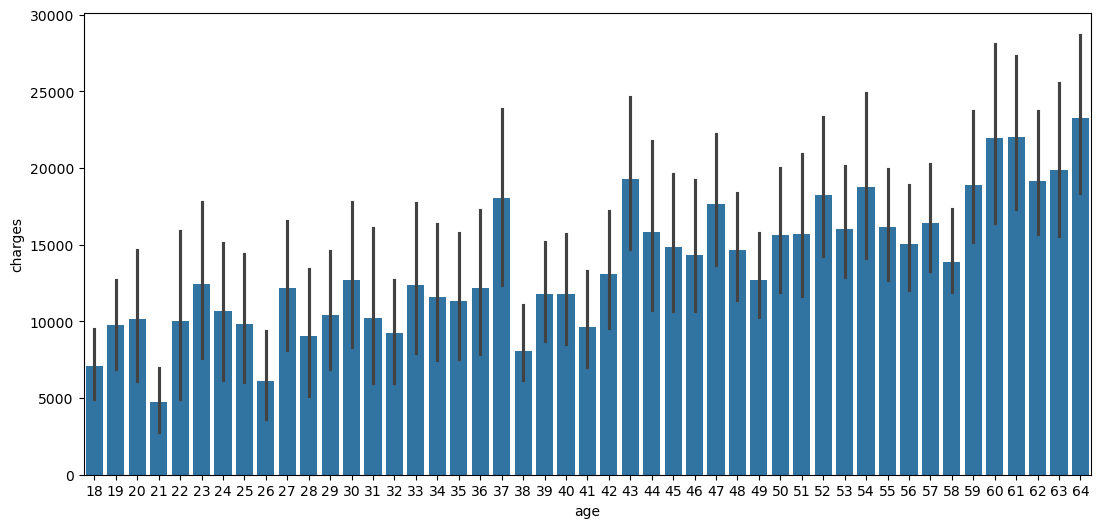

In [75]:
plt.figure(figsize=(13,6))
sns.barplot(x=med_df['age'],y=med_df['charges'])

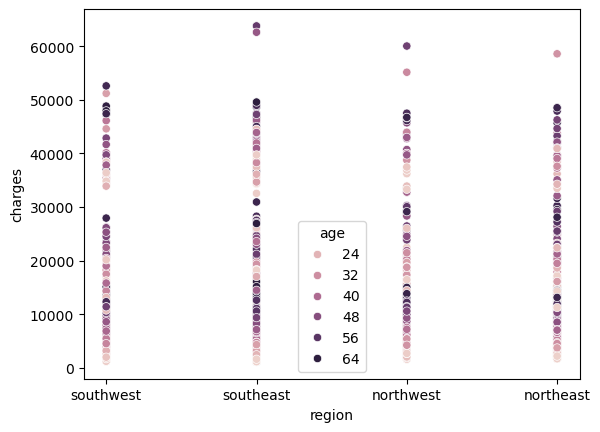

In [76]:
sns.scatterplot(x=med_df['region'],y=med_df['charges'],hue=med_df['age']);

<Axes: >

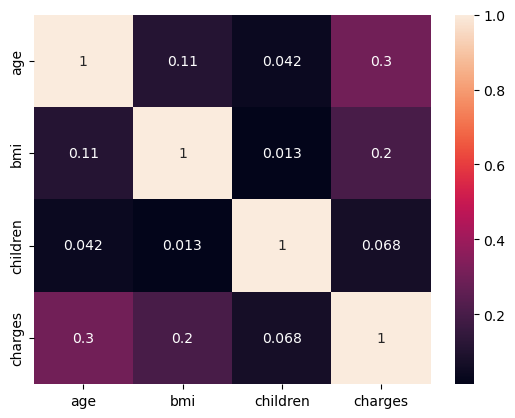

In [77]:
sns.heatmap(med_df.corr(numeric_only=True),annot=True)

In [78]:
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [80]:
for i in med_df[['sex','smoker','region']]:
   print(med_df[i].value_counts())
   print('*****'*8)

sex
male      676
female    662
Name: count, dtype: int64
****************************************
smoker
no     1064
yes     274
Name: count, dtype: int64
****************************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
****************************************


In [87]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le=LabelEncoder()

In [95]:
for col in ['sex','smoker','region']:
    med_df[col]=le.fit_transform(med_df[col])

In [97]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [101]:
X=med_df.drop('charges',axis=1)
y=med_df['charges']

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [109]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [111]:
lr_pred=lr.predict(X_test)
lr_train=round(lr.score(X_train,y_train)*100,2)
lr_r2score=round(r2_score(y_test,lr_pred)*100,2)
lr_mae=mean_absolute_error(y_test,lr_pred)
lr_mse=mean_squared_error(y_test,lr_pred)

In [113]:
print('Training Score :',lr_train)
print('R2 Score :',lr_r2score)
print('MAE :',lr_mae)
print('MSE :',lr_mse)

Training Score : 75.34
R2 Score : 73.81
MAE : 4309.886085914554
MSE : 39627245.94373458


In [115]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [119]:
dtr_pred=dtr.predict(X_test)
dtr_train=round(dtr.score(X_train,y_train)*100,2)
dtr_r2score=round(r2_score(y_test,dtr_pred)*100,2)
dtr_mae=mean_absolute_error(y_test,dtr_pred)
dtr_mse=mean_squared_error(y_test,dtr_pred)

In [121]:
print('Training Score :',dtr_train)
print('R2 Score :',dtr_r2score)
print('MAE :',dtr_mae)
print('MSE :',dtr_mse)

Training Score : 99.88
R2 Score : 71.72
MAE : 3041.7681670149254
MSE : 42787879.99114639


In [123]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
rfr_pred=dtr.predict(X_test)
rfr_train=round(rfr.score(X_train,y_train)*100,2)
rfr_r2score=round(r2_score(y_test,rfr_pred)*100,2)
rfr_mae=mean_absolute_error(y_test,rfr_pred)
rfr_mse=mean_squared_error(y_test,rfr_pred)

In [127]:
print('Training Score :',rfr_train)
print('R2 Score :',rfr_r2score)
print('MAE :',rfr_mae)
print('MSE :',rfr_mse)

Training Score : 97.63
R2 Score : 71.72
MAE : 3041.7681670149254
MSE : 42787879.99114639


In [129]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [131]:
gbr_pred=dtr.predict(X_test)
gbr_train=round(gbr.score(X_train,y_train)*100,2)
gbr_r2score=round(r2_score(y_test,gbr_pred)*100,2)
gbr_mae=mean_absolute_error(y_test,gbr_pred)
gbr_mse=mean_squared_error(y_test,gbr_pred)

In [133]:
print('Training Score :',gbr_train)
print('R2 Score :',gbr_r2score)
print('MAE :',gbr_mae)
print('MSE :',gbr_mse)

Training Score : 90.71
R2 Score : 71.72
MAE : 3041.7681670149254
MSE : 42787879.99114639


In [135]:
model=pd.DataFrame({
    'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor'],
    'Training Score':[lr_train,dtr_train,rfr_train,gbr_train],
    'R2-Score':[lr_r2score,dtr_r2score,rfr_r2score,gbr_r2score]
})

In [137]:
model.sort_values(by='R2-Score')

,Model,Training Score,R2-Score
1,DecisionTreeRegressor,99.88,71.72
2,RandomForestRegressor,97.63,71.72
3,GradientBoostingRegressor,90.71,71.72
0,LinearRegression,75.34,73.81
